# Adam Goebel

## Is there a fund sector that provides better returns or, does higher fund sector differetiation lead to better returns?
For my research I will examine if having diversity in fund sector investment is correlated with a higher rate of return. I will also examine if investment in a specific sector correlates with increased return at various points in time. I will do this by utilising the data provided on fund sector investment to determine if that fund has high, equal, or low fund sector diversity. I will then compare this information to the data provided on the rate of return for each fund.

## Data Analysis Plan
for my data analysis plan i will take the mean value of each fund sector and compare it to fund returns at year to date, one month, three months, one year, three years, five years, and ten years. From there i will take tghe standard deviation of the fund sector investment of each fund and compare it to fund returns at the previous listed time periods. I will also examine the count of fund sector investment and compare it to the previously listed time periods. This analysis should give me a firm understanding of my research question.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/raw/MutualFunds.csv')
df.head()

,fund_symbol,quote_type,region,fund_short_name,fund_long_name,currency,initial_investment,subsequent_investment,fund_category,fund_family,...,peer_environment_avg,peer_environment_max,social_score,peer_social_min,peer_social_avg,peer_social_max,governance_score,peer_governance_min,peer_governance_avg,peer_governance_max
0,AAAAX,MutualFund,US,DWS RREEF Real Assets Fund - Cl,DWS RREEF Real Assets Fund - Class A,USD,1000.0,50.0,World Allocation,DWS,...,5.05,10.58,7.43,5.98,9.07,11.30,5.43,4.26,7.14,8.11
1,AAAEX,MutualFund,US,AllianzGI Health Sciences Fund,Virtus AllianzGI Health Sciences Fund Class P,USD,1000000.0,NaN,Health,Virtus,...,1.43,3.27,12.96,9.52,12.87,15.08,8.40,4.96,7.68,10.30
2,AAAFX,MutualFund,US,NaN,American Century One Choice Blend+ 2015 Portfo...,USD,2500.0,50.0,Target-Date 2015,American Century Investments,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAAGX,MutualFund,US,Thrivent Large Cap Growth Fund,Thrivent Large Cap Growth Fund Class A,USD,2000.0,50.0,Large Growth,Thrivent Funds,...,2.70,5.81,10.13,7.25,10.14,11.97,8.03,5.30,7.54,8.90
4,AAAHX,MutualFund,US,NaN,American Century One Choice Blend+ 2015 Portfo...,USD,5000000.0,NaN,Target-Date 2015,American Century Investments,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(23783, 298)

In [4]:
df.columns

Index(['fund_symbol', 'quote_type', 'region', 'fund_short_name',
       'fund_long_name', 'currency', 'initial_investment',
       'subsequent_investment', 'fund_category', 'fund_family',
       ...
       'peer_environment_avg', 'peer_environment_max', 'social_score',
       'peer_social_min', 'peer_social_avg', 'peer_social_max',
       'governance_score', 'peer_governance_min', 'peer_governance_avg',
       'peer_governance_max'],
      dtype='object', length=298)

In [28]:
df["mean"] = df[['fund_sector_basic_materials','fund_sector_communication_services','fund_sector_consumer_cyclical','fund_sector_consumer_defensive', 'fund_sector_energy','fund_sector_financial_services','fund_sector_healthcare','fund_sector_industrials','fund_sector_real_estate','fund_sector_technology','fund_sector_utilities']].mean(axis=1)
df["std"] = df[['fund_sector_basic_materials','fund_sector_communication_services','fund_sector_consumer_cyclical','fund_sector_consumer_defensive', 'fund_sector_energy','fund_sector_financial_services','fund_sector_healthcare','fund_sector_industrials','fund_sector_real_estate','fund_sector_technology','fund_sector_utilities']].std(axis=1)


In [29]:
df1 = df[['fund_long_name','investment_type','fund_sector_basic_materials','fund_sector_communication_services','fund_sector_consumer_cyclical','fund_sector_consumer_defensive', 'fund_sector_energy','fund_sector_financial_services','fund_sector_healthcare','fund_sector_industrials','fund_sector_real_estate','fund_sector_technology','fund_sector_utilities','mean','std','fund_return_ytd','fund_return_1month','fund_return_3months',
'fund_return_1year','fund_return_3years','fund_return_5years','fund_return_10years'
 ]]

In [30]:
df1.head()

,fund_long_name,investment_type,fund_sector_basic_materials,fund_sector_communication_services,fund_sector_consumer_cyclical,fund_sector_consumer_defensive,fund_sector_energy,fund_sector_financial_services,fund_sector_healthcare,fund_sector_industrials,...,fund_sector_utilities,mean,std,fund_return_ytd,fund_return_1month,fund_return_3months,fund_return_1year,fund_return_3years,fund_return_5years,fund_return_10years
0,DWS RREEF Real Assets Fund - Class A,Value,0.1607,0.0088,0.0190,0.0293,0.1852,0.0000,0.0000,0.1413,...,0.1025,0.090909,0.111754,0.21026,0.00077,0.03920,0.22970,0.13811,0.09078,0.06058
1,Virtus AllianzGI Health Sciences Fund Class P,Blend,0.0368,0.0000,0.0034,0.0000,0.0000,0.0000,0.9598,0.0000,...,0.0000,0.090909,0.288387,0.19077,-0.00662,-0.02221,0.23934,NaN,NaN,NaN
2,American Century One Choice Blend+ 2015 Portfo...,Blend,0.0290,0.0720,0.1184,0.0822,0.0355,0.1679,0.1342,0.1277,...,0.0258,0.090900,0.055245,NaN,-0.00095,0.00095,NaN,NaN,NaN,NaN
3,Thrivent Large Cap Growth Fund Class A,Growth,0.0000,0.1617,0.1957,0.0046,0.0000,0.1458,0.1326,0.0346,...,0.0000,0.090909,0.109188,0.24559,0.03698,0.04608,0.30705,0.31791,0.19264,0.19622
4,American Century One Choice Blend+ 2015 Portfo...,Blend,0.0290,0.0720,0.1184,0.0822,0.0355,0.1679,0.1342,0.1277,...,0.0258,0.090900,0.055245,NaN,NaN,0.00095,NaN,NaN,NaN,NaN


In [31]:
df1.describe()

,fund_sector_basic_materials,fund_sector_communication_services,fund_sector_consumer_cyclical,fund_sector_consumer_defensive,fund_sector_energy,fund_sector_financial_services,fund_sector_healthcare,fund_sector_industrials,fund_sector_real_estate,fund_sector_technology,fund_sector_utilities,mean,std,fund_return_ytd,fund_return_1month,fund_return_3months,fund_return_1year,fund_return_3years,fund_return_5years,fund_return_10years
count,18267.000000,18267.000000,18267.000000,18267.000000,18267.000000,18267.000000,18267.000000,18267.000000,18267.000000,18267.000000,18267.000000,18267.000000,18267.000000,23353.000000,23500.000000,23520.000000,22887.000000,21086.000000,17023.000000,12437.000000
mean,0.049031,0.079892,0.113028,0.059458,0.065239,0.146689,0.114826,0.111368,0.058090,0.167099,0.035280,0.090909,0.099921,0.093610,0.004422,0.022065,0.239720,0.101469,0.081893,0.080488
std,0.086885,0.080717,0.081611,0.066826,0.168345,0.122289,0.101626,0.083963,0.152007,0.111661,0.100849,0.000008,0.070605,0.082261,0.023665,0.031558,0.177877,0.071840,0.056171,0.056927
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090882,0.017414,-0.522800,-0.385300,-0.448700,-0.637900,-0.512700,-0.429600,-0.408200
25%,0.015500,0.031900,0.076000,0.027200,0.004000,0.088400,0.067350,0.068600,0.005400,0.096700,0.000000,0.090900,0.058054,0.026300,0.000100,0.008200,0.080500,0.055800,0.042600,0.040600
50%,0.040300,0.078500,0.118100,0.056900,0.028000,0.147700,0.117100,0.109700,0.025300,0.174200,0.021200,0.090909,0.072141,0.092300,0.007000,0.021600,0.250500,0.091100,0.078300,0.078500
75%,0.055850,0.102400,0.138800,0.073900,0.045600,0.179700,0.139700,0.143800,0.047500,0.220650,0.030500,0.090918,0.104115,0.149800,0.013000,0.035000,0.362500,0.135300,0.112500,0.117700
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.090936,0.301511,0.578900,0.474700,0.538500,1.350300,0.648240,0.448580,0.398600


C:\Users\adamv\AppData\Local\Temp\ipykernel_18828\919981450.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df1.corr()


<AxesSubplot:>

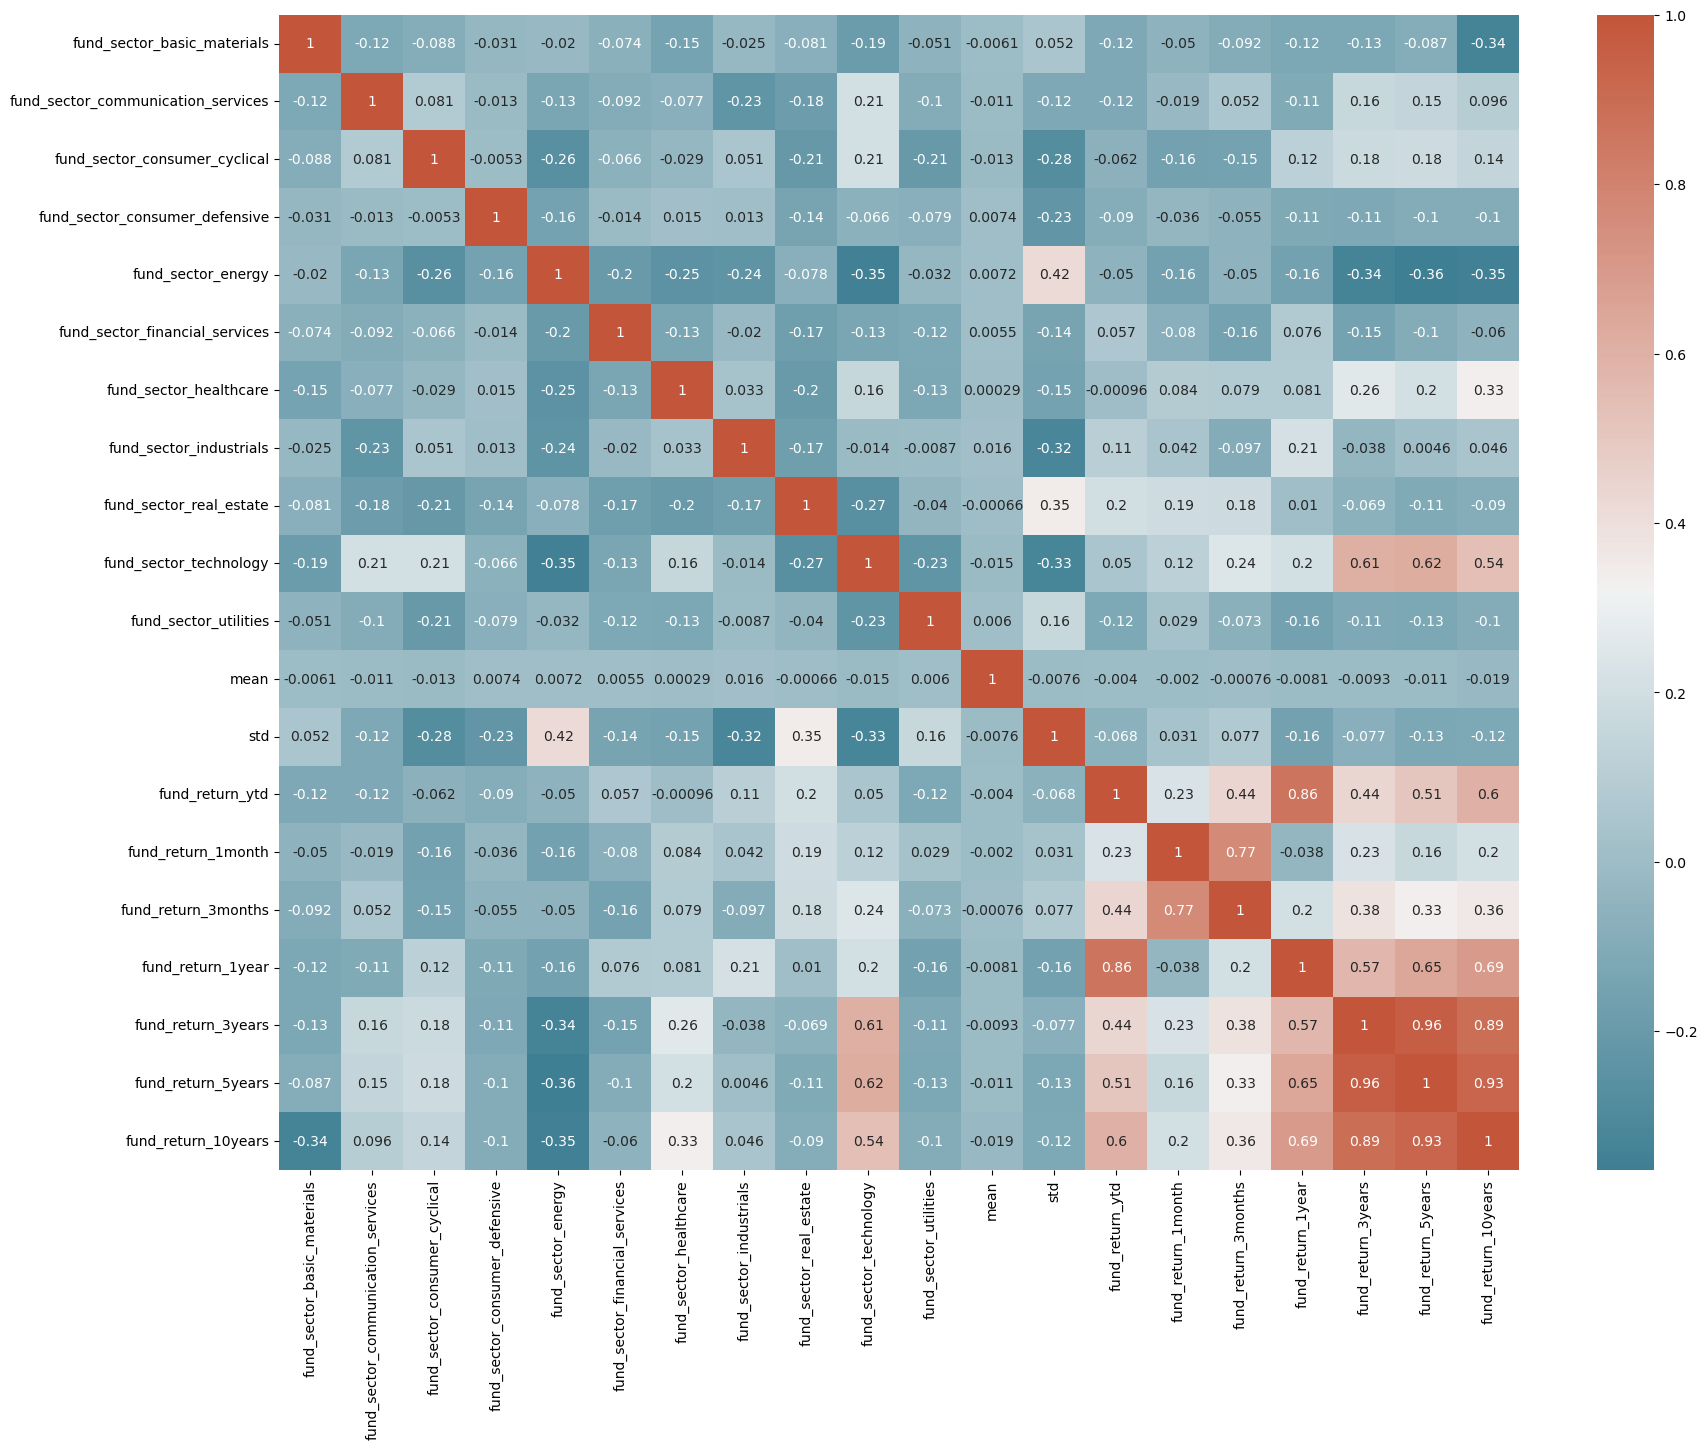

In [12]:
corr = df1.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

# There seems to be a correlation between investment in technology and returns after 3, 5, and 10 years. This is worth looking into in future data analysis.
# There also seems to be a correlation between fund returns at various points in time. (possibly outside of scope)
# What is the relationship between investment in the technology sector and returns after x number of years?
# correlation between energy fund sector and standard deviation? maybe outlier data?

<AxesSubplot:ylabel='Frequency'>

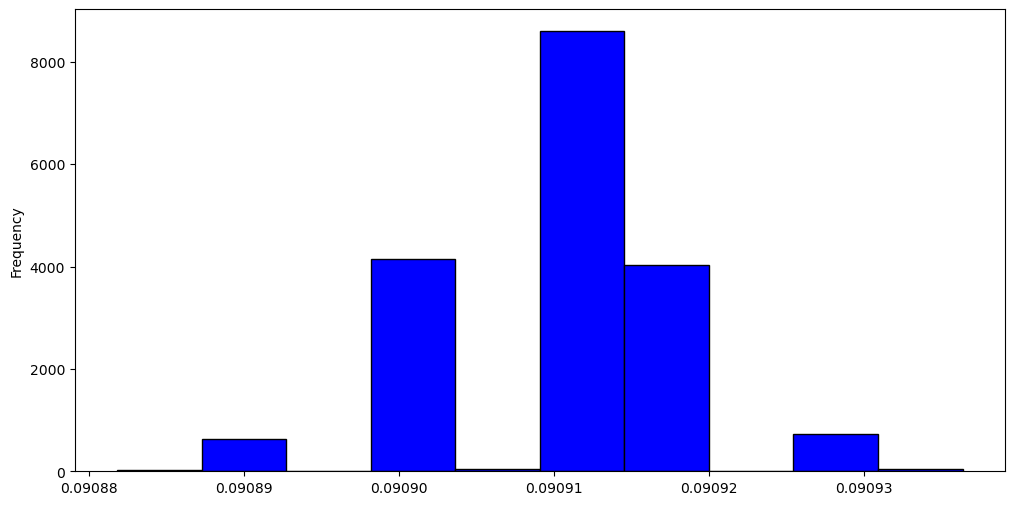

In [42]:
df1['mean'].plot(kind='hist', bins=10, figsize=(12,6), facecolor='blue',edgecolor='black')

# Instead of taking mean of a fund sector investment, look at mean of investment in that sector and compare it to rate of return

<AxesSubplot:ylabel='Frequency'>

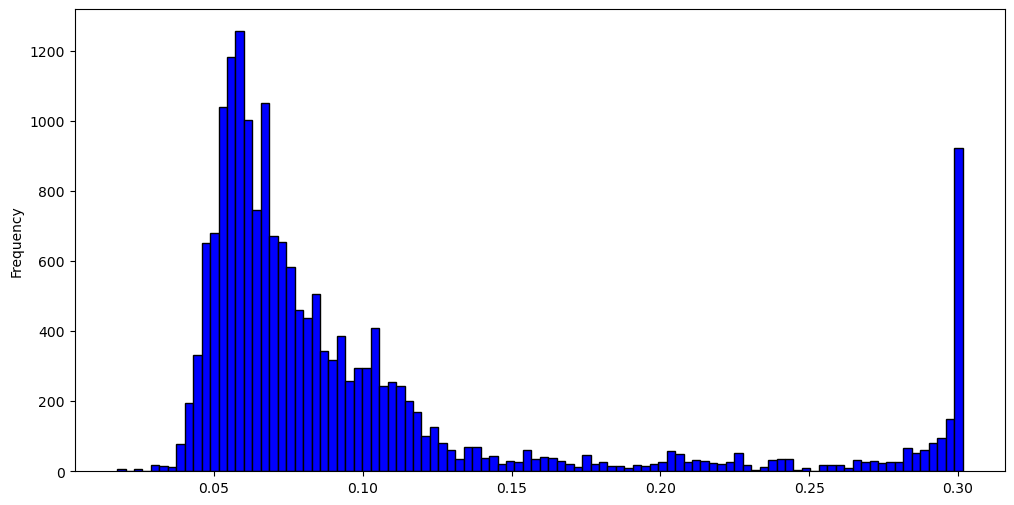

In [38]:
df1['std'].plot(kind='hist', bins=100, figsize=(12,6), facecolor='blue',edgecolor='black')

# Distribution of the standard deviation of fund sector investment by funds, can further narrow this down to be representative of number of sectors a company is invested to aquire more accurate information.

<AxesSubplot:ylabel='Frequency'>

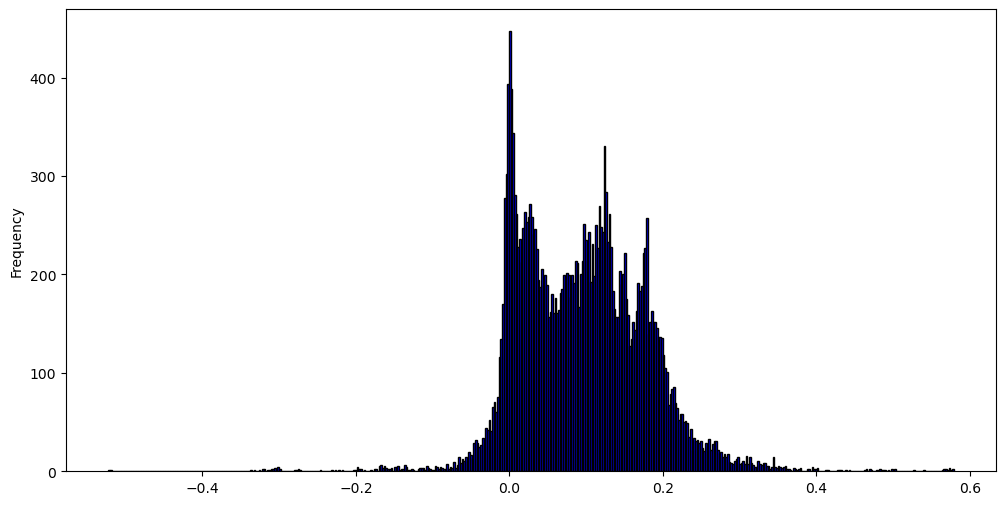

In [45]:
df1['fund_return_ytd'].plot(kind='hist', bins=500, figsize=(12,6), facecolor='blue',edgecolor='black')


# distribution of fund return ytd is multimodal, is this caused by investments in specific sectors?

<AxesSubplot:ylabel='Frequency'>

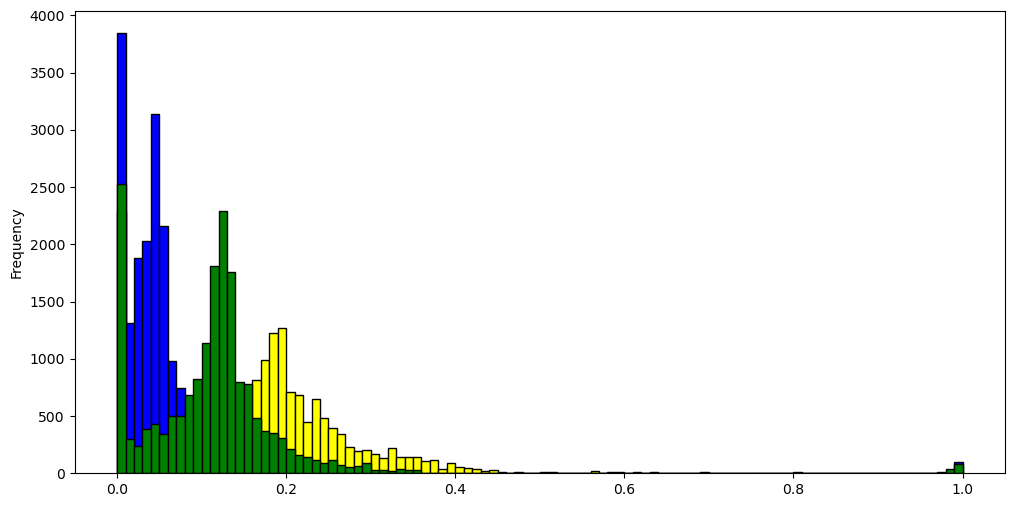

In [46]:
df1['fund_sector_basic_materials'].plot(kind='hist', bins=100, figsize=(12,6), facecolor='blue',edgecolor='black')
df1['fund_sector_technology'].plot(kind='hist', bins=100, figsize=(12,6), facecolor='yellow',edgecolor='black')
df1['fund_sector_healthcare'].plot(kind='hist', bins=100, figsize=(12,6), facecolor='green',edgecolor='black')

# Example of distribution of fund sector investment by different funds.